## API querying and data visualisation

### The assignment

We are to do the following excersize:
- 1. Create a complicated query showingthe relationship between two features in a data frame
- 2. Either using the data that you have found or generating data from another query, create a visualisation 

### The Query

What if we looked at price point of bar in $$ and the average length of the review. The hypothesis being that people who eat/drink at a fancy establishment, are more heavily invested in the experience and would therefore be likely to respond with a long review. 

The hypothesis is that restraunts with a higher price point have review lengths significantly longer than those with lower price points. For now, we are not worried about whether a review was positive or negative, though we can look into that variable once we are done.

This draws on research done into the Expected utility hypothesis. 

We could further group these reviews into short, medium and long reviews and look at differences between them in terms of sentiment. But i do not know how to do that yet. 


So i want to first return a list of businesses with the lowerst price rating and a list of 50 businesses with the highest price ratings. 

Then i need to make another query to return the reviews for those 50 restaurants. 

Then i need to convert those to pd and clean them up. 

Then i will extract out the list of lengths for each

Then I will use a t-test to compare their means

graph the result and boom.


In [7]:
# import the relevant libraries
import pandas as pd
import numpy as np
import requests
import os
import json
#from yelp.client import Client
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [338]:
# open up a connection to the API
MY_API_KEY = None
term = 'steakhouse'
price = '1,2'
location = 'Brooklyn'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

# Key goes into the headers parameter of the .get method.
headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'price': price,
                'term': term.replace(' ', '+'), # The search terms should be joined by a "+"
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)

In [339]:
response.status_code

200

In [340]:
affordable_steakhouse = response.text
affordable_steakhouse = json.loads(affordable_steakhouse)

In [341]:
affordable_steakhouse.keys()

dict_keys(['businesses', 'total', 'region'])

In [342]:
affordable_steakhouse['total']

1100

In [343]:
# Get expensive steakhouses
term = 'steakhouse'
price = '3,4'
location = 'Brooklyn'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

# Key goes into the headers parameter of the .get method.
headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'price': price,
                'term': term.replace(' ', '+'), # The search terms should be joined by a "+"
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)

In [344]:
response.status_code

200

In [345]:
expensive_steakhouse = response.text
expensive_steakhouse = json.loads(expensive_steakhouse)

In [346]:
expensive_steakhouse['total']

535

In [352]:
df_affordable = pd.DataFrame.from_dict(affordable_steakhouse['businesses'])
df_affordable.set_index('id', inplace = True)
groupby_affordable = df_affordable.groupby(['price']).rating.mean()

In [353]:
df_expensive = pd.DataFrame.from_dict(expensive_steakhouse['businesses'])
df_expensive.set_index('id', inplace = True) 
groupby_expensive = df_expensive.groupby(['price']).rating.mean()


In [354]:
total_group = pd.concat([groupby_expensive, groupby_affordable])


In [356]:
total_group.index = [3,4,1,2]

In [372]:
final=total_group.sort_index()
y = final
x = final.index

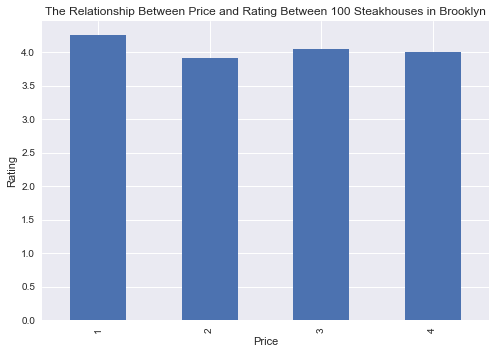

In [390]:
final.plot(kind = 'bar', 
           x = 'price of restaurant', 
           y = 'average rating', 
           title = 'The Relationship Between Price and Rating Between 100 Steakhouses in Brooklyn',
            )
plt.xlabel('Price')
plt.ylabel('Rating')

plt.savefig('foo.png')
# fig = plt.figure(figsize=(16,8))
# ax = fig.add_subplot()
# ax.bar(x,y);
# ax.set_xticks(range(1,4));

# ax.title('relationship between price and rating')

In [119]:
df_expensive_minimised = df_expensive[['name', 'price']]
df_affordable_minimused = df_affordable[['name', 'price']]

In [213]:
index='4yPqqJDJOQX69gC66YUDkA'
url_reviews =  f'https://api.yelp.com/v3/businesses/{index}/reviews'
url_param = {
    'limit': 50
}

In [214]:
# Make a call to the api 
response = requests.get(url_reviews, headers=headers, params=url_param)

In [215]:
response.status_code

200

In [216]:
peter_lugar_reviews = json.loads(response.text)
peter_lugar_reviews.keys()


dict_keys(['reviews', 'total', 'possible_languages'])

In [217]:
peter_lugar_reviews['total']

5774

In [221]:
df_peter_lugar_reviews = pd.DataFrame(peter_lugar_reviews['reviews'])
df_peter_lugar_reviews
pd.concat([df_peter_lugar_reviews, df_peter_lugar_reviews])

,id,url,text,rating,time_created,user
0,yebMI0KkuMHimrY1sIqR8Q,https://www.yelp.com/biz/peter-luger-brooklyn-...,There's a reason this place is 133 years old a...,5,2020-09-04 16:20:53,"{'id': 'ROc3t8VxERp5rO7K16ngOg', 'profile_url'..."
1,cQ7ISTyb-L2rzKJaktJVqA,https://www.yelp.com/biz/peter-luger-brooklyn-...,After living in New York City my whole life I ...,5,2020-07-31 12:41:37,"{'id': '4ecxgN6DXQSMSigQgkXIAA', 'profile_url'..."
2,cd6pI11bwcNHD0VrrUcwag,https://www.yelp.com/biz/peter-luger-brooklyn-...,My favorite steak house in America. Haven't tr...,5,2020-08-11 09:58:49,"{'id': 'NxtQashCHFBea9JRF1e_xA', 'profile_url'..."
0,yebMI0KkuMHimrY1sIqR8Q,https://www.yelp.com/biz/peter-luger-brooklyn-...,There's a reason this place is 133 years old a...,5,2020-09-04 16:20:53,"{'id': 'ROc3t8VxERp5rO7K16ngOg', 'profile_url'..."
1,cQ7ISTyb-L2rzKJaktJVqA,https://www.yelp.com/biz/peter-luger-brooklyn-...,After living in New York City my whole life I ...,5,2020-07-31 12:41:37,"{'id': '4ecxgN6DXQSMSigQgkXIAA', 'profile_url'..."
2,cd6pI11bwcNHD0VrrUcwag,https://www.yelp.com/biz/peter-luger-brooklyn-...,My favorite steak house in America. Haven't tr...,5,2020-08-11 09:58:49,"{'id': 'NxtQashCHFBea9JRF1e_xA', 'profile_url'..."


In [134]:
df_peter_lugar_reviews['review_len'] = df_peter_lugar_reviews['text'].apply(lambda x: len(x))

In [ ]:
df_peter_lugar_reviews['review_len']

## Plan of attack


I have so far created data frame containing the index and names of the the most expensive steakhouses and the cheapest steakhouses. 

From there, i extracted 1 such steak houses and examined the 3 most recent review. I was unable to return more than this from the review API. But this is sufficent... for a little project at least. I will average accross those number. 

So my psuedo code from this point will be 

Create a list of index's from each data from.

Create a index matched list of names from the data frame
    iterate through the list
    for each id create a dataframe
    in each data frame create a review length column
    average those lengths
    append that average to a list
    return the list

for each item in the list return the average le

In [302]:
# Creat a list of indexes from each data frame
list_expensive_index = (list(df_expensive.index))
df_expensive_names = list(df_expensive.name)

list_affordable_index = list(df_affordable.index)
df_affordable_names = list(df_affordable.name)


total_id_list = list_affordable_index + list_expensive_index

psuedo code:

create a pandas df with the correct columns TODO

    for each id do the following TODO
    request the json text ! done
    parse the json text using the json library ! done
    convert the dictiornay into a data frame ! done
    concat the data frame to the master df. ! done 
    increment the offset counter by 3

In [271]:
list_expensive_index = (list(df_expensive.index))
list_expensive_names = list(df_expensive.name)

list_affordable_index = list(df_affordable.index)
list_affordable_names = list(df_affordable.name)


total_id_list = list_affordable_index + list_expensive_index


In [466]:
# Create a master df
master = pd.DataFrame(columns = list(df_peter_lugar_reviews.columns) + ['restaurant_id'])
master

,id,url,text,rating,time_created,user,restaurant_id


In [276]:
total_id_list[5]

'Kyk2Dj5eTwdE5ztvDxUYIQ'

In [200]:
# def create_review_dataframe(master_df, id_list):
#     for item in id_list:
#         offset = 0
#         while offset < 13: # take 12 reviews for each entry and append it to a list
#             response_object = api_request(item, offset)
#             json_dict = to_dict(response_object)
#             df = to_pandas(json_dict)
#             offset += 3
#     return pd.concat([master_df, df])

In [258]:
# def create_review_dataframe(master_df, id_list):
#     for item in id_list:
#         offset = 0
#         while offset < 13:
#             response_object = api_request(item, offset)
#             json_dict = to_dict(response_object)
#             df = to_pandas(json_dict)
#             master_df = pd.concat([master_df, df])
#             offset += 3
#     return master_df

In [424]:
def create_review_dataframe(master_df, id_list):
    for item in id_list:
        response_object = api_request(item)
        json_dict = to_dict(response_object)
        df = to_pandas(json_dict)
        # Add a column that is equal to the name associated with the index.
        df['restaurant_id'] = item
        master_df = pd.concat([master_df, df]).copy()

    return master_df

In [464]:
master_df

,id,url,text,rating,time_created,user
0,lLqFghOQYB6j4LXMRTVEnQ,https://www.yelp.com/biz/trad-room-brooklyn-2?...,Our favorite !\nAmazing Japanese friend chicke...,5,2020-09-05 18:15:07,"{'id': 'p5SUoC-EZyn77cmnWhRE_w', 'profile_url'..."
1,RZEotKtywh1u6FosyYh0qw,https://www.yelp.com/biz/trad-room-brooklyn-2?...,A good friend recommended this wonderful rest...,5,2020-08-21 12:19:46,"{'id': 'Spl1iKkNbVyWV-fnsKymjg', 'profile_url'..."
2,JK-_xYvBOKEu-jNQ5ZrFmg,https://www.yelp.com/biz/trad-room-brooklyn-2?...,"The ambiance is a five for dinner, with low li...",3,2019-12-07 04:51:28,"{'id': 'qtgr1_fvKoMJd4t-naoGqg', 'profile_url'..."
0,Uwlf7bgjMVt-Cj8Ay_jwRA,https://www.yelp.com/biz/outback-steakhouse-br...,So....I've always enjoyed Outback...various lo...,4,2020-02-08 15:32:33,"{'id': '3cxFCO8Jqt0outGbNbAphw', 'profile_url'..."
1,EEXtB1QvoyD3XIMC_V67qw,https://www.yelp.com/biz/outback-steakhouse-br...,So inspite of my last review I did go back sin...,1,2020-08-25 19:23:46,"{'id': 'qAsDtkgWo76xlfOb6KOueg', 'profile_url'..."
...,...,...,...,...,...,...
1,j2H6a4rcyLOnlwztEJEfJA,https://www.yelp.com/biz/quality-eats-new-york...,Small place and a bit loud. There were three o...,5,2019-10-16 10:47:08,"{'id': 'isilLts_tupKm4-pN2FAFQ', 'profile_url'..."
2,u0clZvhplGaIf722YB41Rg,https://www.yelp.com/biz/quality-eats-new-york...,Blown Away.\n\ntl;dr - here are the words you ...,5,2019-09-13 13:27:23,"{'id': '0-o7NXsNRQwjLDovu5YKZw', 'profile_url'..."
0,yfMxHkMTJDd-K4pBdRMp5Q,https://www.yelp.com/biz/club-a-steakhouse-new...,Much needed review!!! I love this place even t...,5,2020-06-23 05:33:09,"{'id': 'XUNfUfXO8VK1g7sgOjUj0Q', 'profile_url'..."
1,zn6qayufNxhfbxyliMk_8A,https://www.yelp.com/biz/club-a-steakhouse-new...,We arrived a a few min late because of traffic...,5,2020-07-20 09:43:37,"{'id': 'XX4M6h2fszYiIevwWsGAJw', 'profile_url'..."


In [463]:
master_df[master_df.id == list_affordable_index[0]]

,id,url,text,rating,time_created,user


In [451]:
master_minimised = master_df[['id','text']]

In [453]:
master_minimised['text_len'] = master_minimised.text.apply(lambda x: len(x))

/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [458]:
master_minimised.groupby('id').mean()

,text_len
id,
-9BNHPocRqza0mmB3cIAIg,121
-Ztu_vJf-1bxbqs51HBg8w,158
-fvuYBMsb6wYXjx3JMwbAA,154
-sVBoabBXNg0Qkl2pyy0Ew,154
02VM4Uu-t0lVbsbZT72wzQ,158
...,...
z7NxrkpV4g_fHTNxmThM_A,155
zQrEn9HsQd79rFXoGcoeuw,115
zVfiIjYgYEN_lcs3YuQ37g,139


In [420]:
# Works!
def to_pandas(json_dict):
    df = pd.DataFrame.from_dict(json_dict['reviews'])
    return df

In [421]:
def to_dict(response_object):
    return json.loads(response_object.text)

In [422]:
# Works!
def concat_df(df1, df2):
    df3 = pd.concat([df1,df2])
    return df3

In [423]:
# def api_request(i_d):
#     headers = {
#     'Authorization': 'Bearer {}'.format(MY_API_KEY),
#     }
#     url = f'https://api.yelp.com/v3/businesses/{i_d}/reviews'
#     return requests.get(url, headers=headers) # removed the params as reviews does not have an offset featur

In [443]:
to_pandas(to_dict(api_request(total_id_list[3])))

,id,url,text,rating,time_created,user
0,lAQTLYL8MyTCFvXWLSatMA,https://www.yelp.com/biz/el-almacen-brooklyn?a...,This review is long overdue. I've dined here s...,5,2020-03-10 19:57:03,"{'id': 'N3PHYvNr1MV9NzMwQ5Vz-w', 'profile_url'..."
1,VESgPq8S0tOfImYbfig9Ww,https://www.yelp.com/biz/el-almacen-brooklyn?a...,2nd visit to El Almacen \n\nI give them 3 star...,3,2019-10-27 12:04:09,"{'id': 'gKuurPSpdKrplvjoHio6zg', 'profile_url'..."
2,5_o8Px0s-zxa7uSQ4sixTQ,https://www.yelp.com/biz/el-almacen-brooklyn?a...,Just popped in here for an after-work drink wi...,4,2020-03-04 10:55:51,"{'id': 'Fp5ORVnXCYAvIhmydRYekw', 'profile_url'..."


In [287]:
def insert_review_len(dataframe):
    dataframe['review_len'] = dataframe['review'].apply(lambda x: len(x))
    return dataframe

In [467]:
MY_API_KEY = None

In [442]:
def api_request(i_d):
    headers = {
    'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

    url = f'https://api.yelp.com/v3/businesses/{i_d}/reviews'
    return requests.get(url, headers=headers)